## IMPORTING THE LIBRARIES

## 1.Data Collection

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load The Dataset
EV_Sales = pd.read_csv(r"E:\Project\UNIFIED PROJECT\Electric Vehicle Sales by State in India(Data Analyst & Data Science)\Electric Vehicle Sales by State in India.csv")


In [3]:
#Display the first few rows of the dataset
print(EV_Sales.head())

     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  


## 2.Data Preprocessing

In [4]:
EV_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [5]:
# Change Datatype 
EV_Sales['Date'] = pd.to_datetime(EV_Sales['Date'])

In [6]:
EV_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  float64       
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.9+ MB


In [7]:
#Check for missing values
print(EV_Sales.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


## 3.Exploratory Data Analysis

**Visualize trends in EV sales over time, across states, vehicle categories, vehicle classes, market share.**

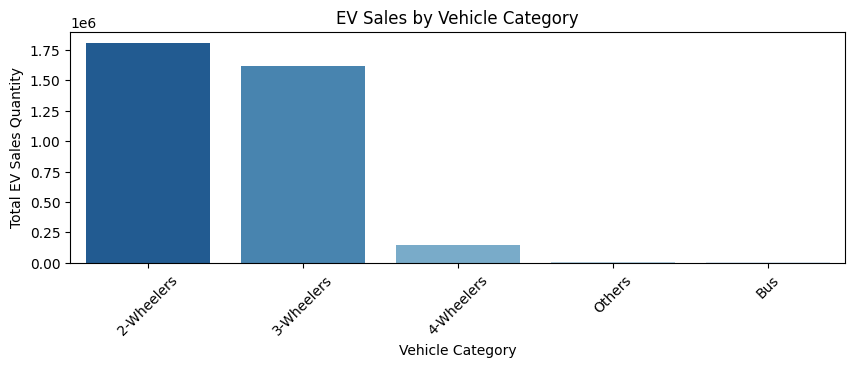

Vehicle_Category
2-Wheelers    1808105.0
3-Wheelers    1620310.0
4-Wheelers     149775.0
Others           8612.0
Bus              7009.0
Name: EV_Sales_Quantity, dtype: float64

In [8]:
# EV Sales by Vehicle Category
vehicle_category_sales = EV_Sales.groupby("Vehicle_Category")["EV_Sales_Quantity"].sum().sort_values(ascending=False)

# Plot EV sales by vehicle category
plt.figure(figsize=(10, 3))
sns.barplot(x=vehicle_category_sales.index, y=vehicle_category_sales.values, palette="Blues_r")
plt.title("EV Sales by Vehicle Category")
plt.xlabel("Vehicle Category")
plt.ylabel("Total EV Sales Quantity")
plt.xticks(rotation=45)
plt.show()

# Display vehicle category sales data
vehicle_category_sales

**2-Wheelers (1.8M sales) and 3-Wheelers (1.62M sales) dominate the EV market.

4-Wheelers (149K sales) have a lower adoption rate.

Buses (7K sales) and Other categories (8.6K sales) contribute the least.**

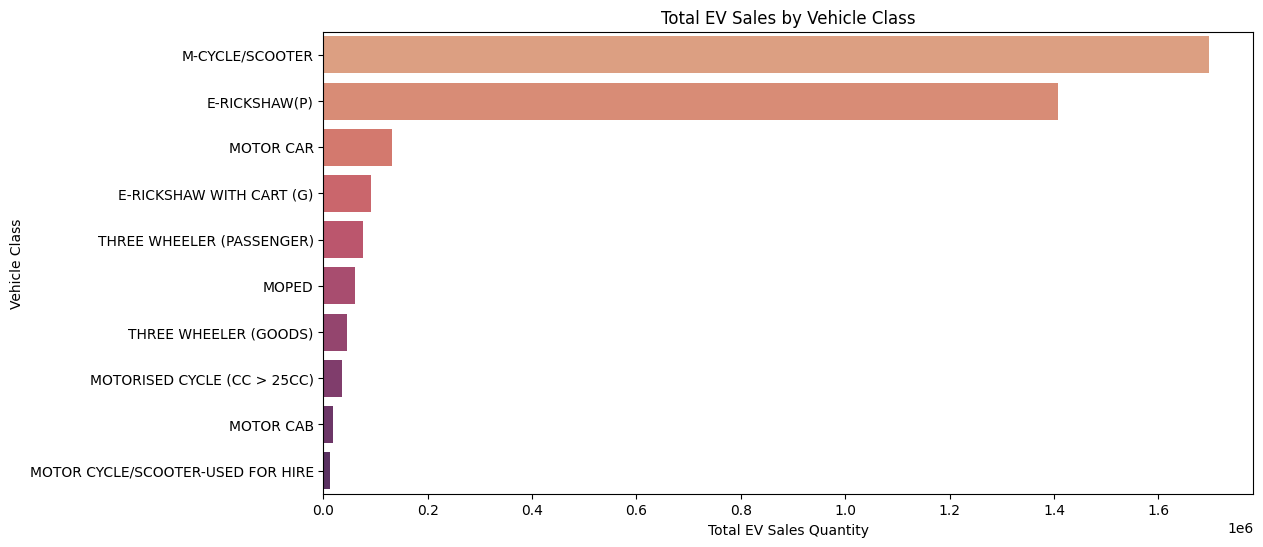

In [9]:
#EV sales by vehicle class
plt.figure(figsize=(12, 6))
vehicle_class_sales = EV_Sales.groupby("Vehicle_Class")["EV_Sales_Quantity"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=vehicle_class_sales.values, y=vehicle_class_sales.index, palette="flare")
plt.title("Total EV Sales by Vehicle Class")
plt.xlabel("Total EV Sales Quantity")
plt.ylabel("Vehicle Class")
plt.show()


** This bar chart shows the total EV sales by vehicle class, helping us understand which types of vehicles contribute the most to EV adoption. Next, let's analyze year-wise sales for the top 5 states.**

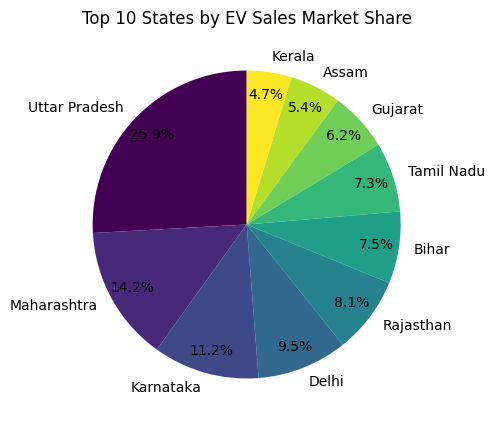

In [10]:
#Plot top 10 states by market share
state_sales = EV_Sales.groupby("State")["EV_Sales_Quantity"].sum().sort_values(ascending=False)
state_market_share = (state_sales / state_sales.sum()) * 100

# Plot top 10 states by market share
plt.figure(figsize=(10, 5))
state_market_share.head(10).plot(kind="pie", autopct="%1.1f%%", cmap="viridis", startangle=90, pctdistance=0.85)
plt.title("Top 10 States by EV Sales Market Share")
plt.ylabel("")
plt.show()


**Uttar Pradesh leads with 20.37% of India's EV market.

Maharashtra (11.17%) and Karnataka (8.77%) follow.

Delhi (7.47%) and Rajasthan (6.36%) also contribute significantly.

The top 5 states account for over 50% of total EV sales.**

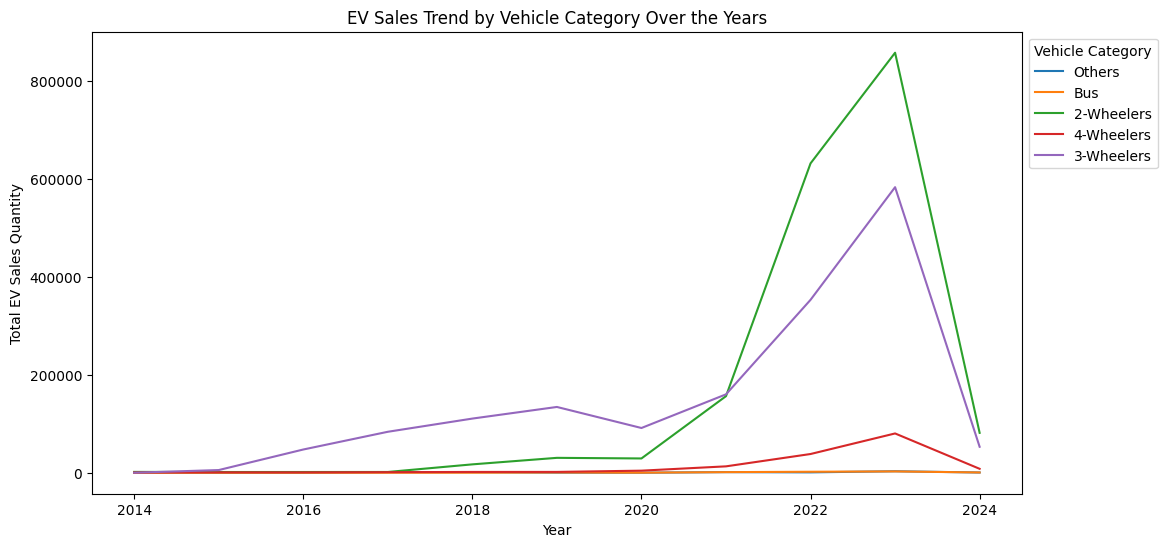

In [11]:
#Plot EV sales over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=EV_Sales, x="Year", y="EV_Sales_Quantity", hue="Vehicle_Category", estimator=sum, ci=None, palette="tab10")
plt.title("EV Sales Trend by Vehicle Category Over the Years")
plt.xlabel("Year")
plt.ylabel("Total EV Sales Quantity")
plt.legend(title="Vehicle Category", bbox_to_anchor=(1, 1))
plt.show()

**This line plot visualizes the EV sales trend for different vehicle categories over the years, showing which categories have seen growth. Next, let's look at the EV sales distribution across states using a violin plot. ​**

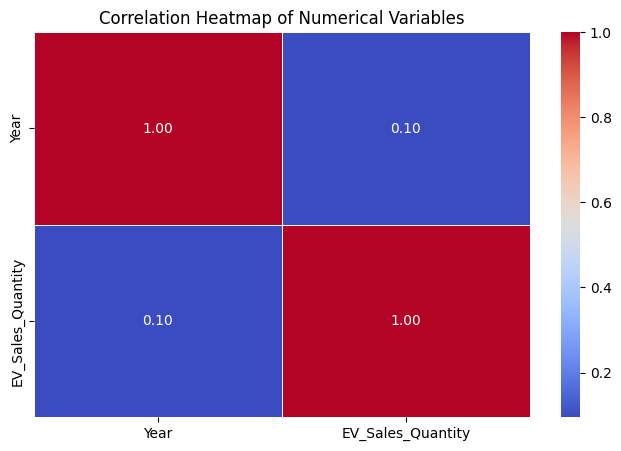

In [12]:
#Correlation heatmap of numerical variables
plt.figure(figsize=(8, 5))
sns.heatmap(EV_Sales.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


** eak correlation (0.095) between Year and EV Sales Quantity.
Suggests that while EV adoption has increased over time, sales are influenced by other factors like policies, infrastructure, and incentives.**

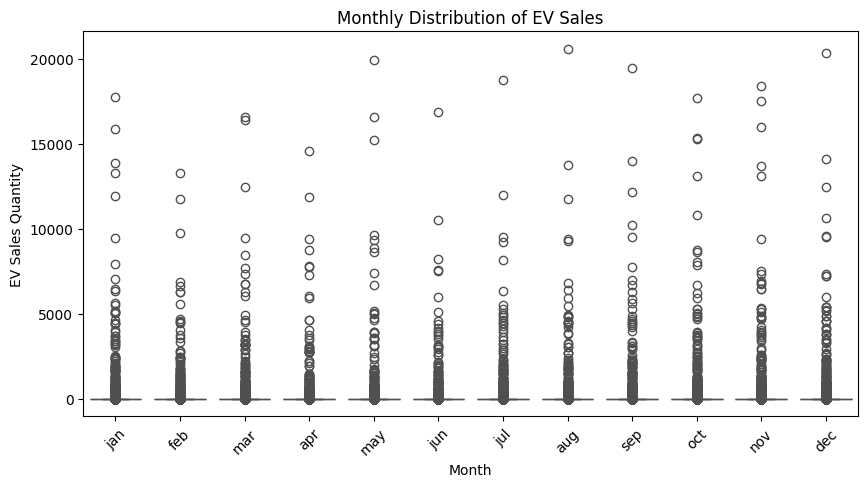

In [13]:
#Monthly trend of EV sales
plt.figure(figsize=(10, 5))
sns.boxplot(x=EV_Sales["Month_Name"], y=EV_Sales["EV_Sales_Quantity"], palette="coolwarm")
plt.title("Monthly Distribution of EV Sales")
plt.xlabel("Month")
plt.ylabel("EV Sales Quantity")
plt.xticks(rotation=45)
plt.show()


** The box plot shows the distribution of EV sales across different months, helping us understand seasonal trends. Next, let's analyze EV sales by state.**

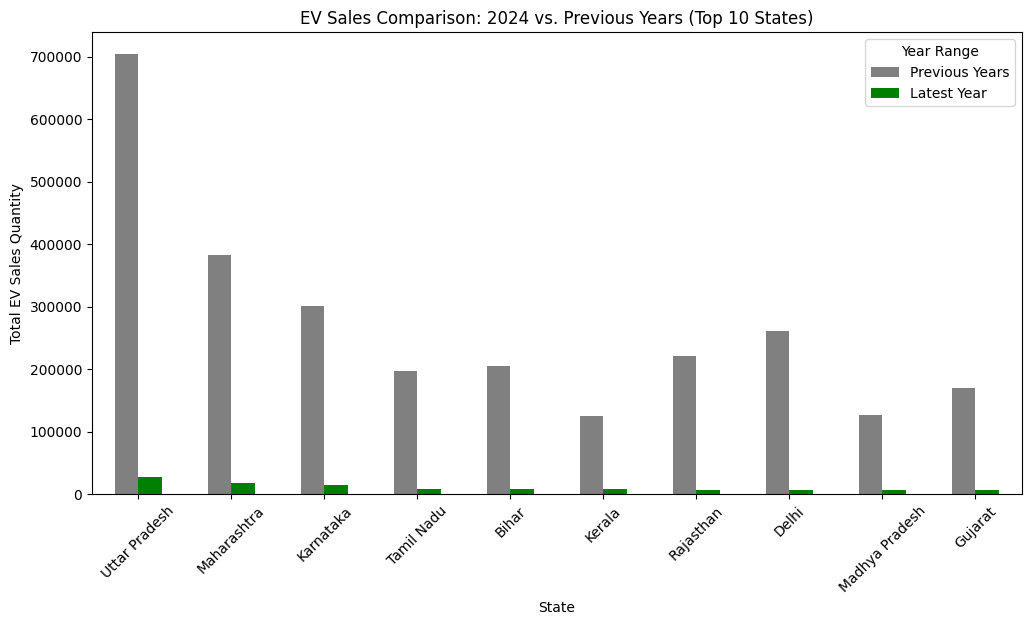

In [14]:
#Comparison of EV sales in the most recent year vs. previous years
latest_year = int(EV_Sales["Year"].max())
previous_years = EV_Sales[EV_Sales["Year"] < latest_year]
latest_year_sales = EV_Sales[EV_Sales["Year"] == latest_year].groupby("State")["EV_Sales_Quantity"].sum()
previous_years_sales = previous_years.groupby("State")["EV_Sales_Quantity"].sum()

comparison_EV_Sales = pd.DataFrame({"Previous Years": previous_years_sales, "Latest Year": latest_year_sales}).fillna(0)
comparison_EV_Sales = comparison_EV_Sales.sort_values("Latest Year", ascending=False).head(10)

comparison_EV_Sales.plot(kind="bar", figsize=(12, 6), color=["gray", "green"])
plt.title(f"EV Sales Comparison: {latest_year} vs. Previous Years (Top 10 States)")
plt.xlabel("State")
plt.ylabel("Total EV Sales Quantity")
plt.xticks(rotation=45)
plt.legend(title="Year Range")
plt.show()

** This bar chart compares EV sales in the most recent year against previous years for the top 10 states, highlighting growth trends. Lastly, let's analyze the distribution of EV sales across different vehicle types using a box plot.**

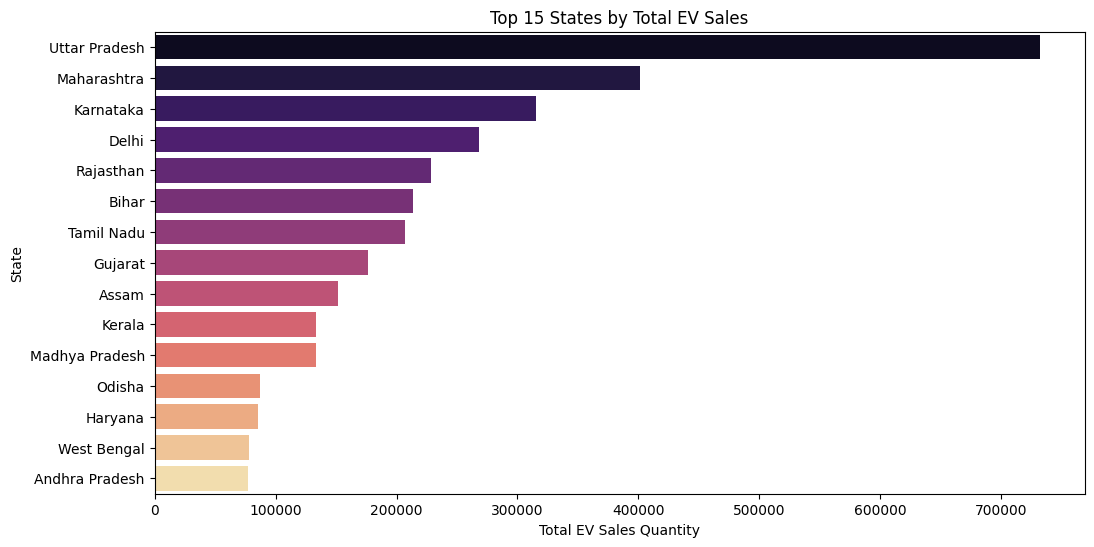

In [15]:
#Total EV sales by state
plt.figure(figsize=(12, 6))
state_sales = EV_Sales.groupby("State")["EV_Sales_Quantity"].sum().sort_values(ascending=False).head(15)
sns.barplot(x=state_sales.values, y=state_sales.index, palette="magma")
plt.title("Top 15 States by Total EV Sales")
plt.xlabel("Total EV Sales Quantity")
plt.ylabel("State")
plt.show()

** This bar chart highlights the top 15 states in India with the highest EV sales. Now, let's analyze EV sales by vehicle type.**

##  Feature Engineering

In [19]:
# Extract Month and Day from the Date column
EV_Sales['Month'] = EV_Sales['Date'].dt.month
EV_Sales['Day'] = EV_Sales['Date'].dt.day
# Encode categorical variables using one-hot encoding
EV_Sales_encoded = pd.get_dummies(EV_Sales, columns=['State',
'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'],
drop_first=True)
# Drop unnecessary columns like Date, Month_Name (if already extracted into numerical values)
EV_Sales_encoded.drop(['Date', 'Month_Name'], axis=1, inplace=True)


## Modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [23]:
# Split the data into features and target variable
X = EV_Sales_encoded.drop('EV_Sales_Quantity', axis=1)
y = EV_Sales_encoded['EV_Sales_Quantity']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Instantiate the model
model = RandomForestRegressor(n_estimators=100,
random_state=42)
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 130.58175227721011


## Model Evaluation


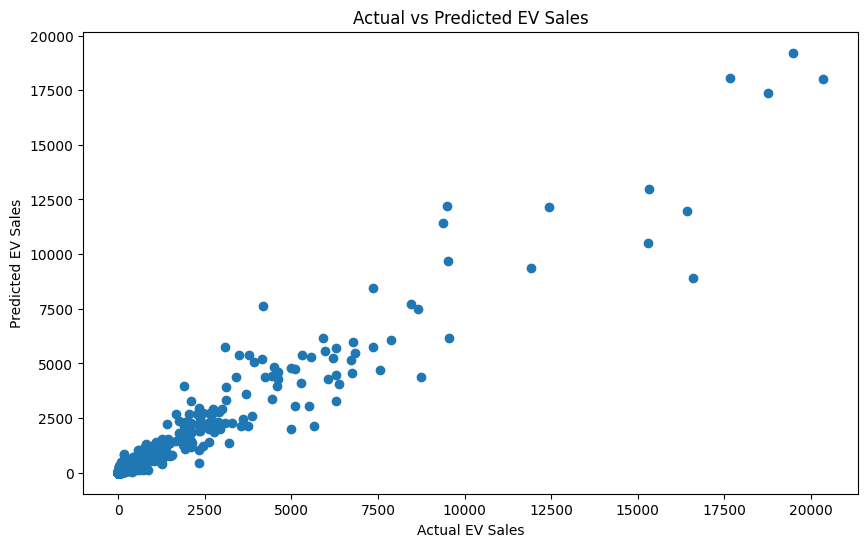

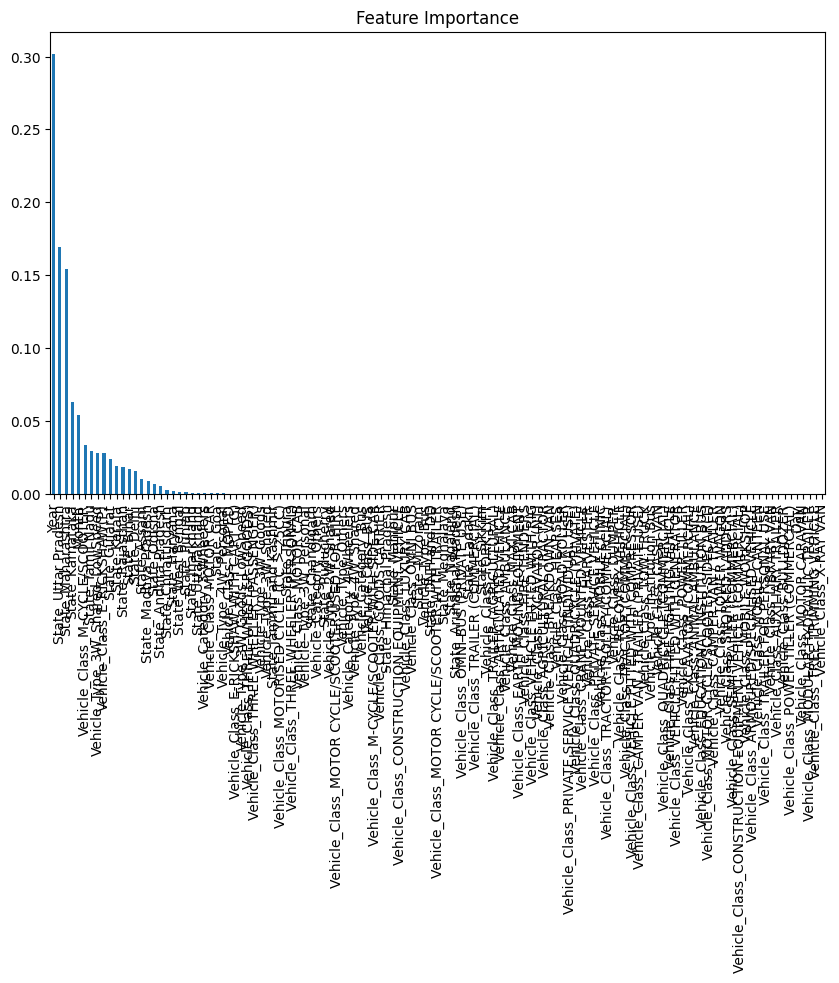

In [25]:
# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()
# Check feature importance
importance = model.feature_importances_
feature_importance = pd.Series(importance,
index=X_train.columns).sort_values(ascending=False)
# Plot the most important features
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

## Conclusion


**The analysis of EV sales in India shows a strong growth trend, with certain states leading in adoption. Two-wheeler and three-wheeler EVs dominate the market. Seasonal variations and policy impacts influence sales. Continuous growth suggests increasing EV acceptance, but infrastructure improvements are crucial for sustained expansion.**